In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
training_df = pd.read_csv("gdrive/My Drive/ML/CIS4515/reviews_Apps_for_Android_5.training.txt", delimiter='\t', header=None)
testing_df = pd.read_csv("gdrive/My Drive/ML/CIS4515/reviews_Apps_for_Android_5.test.txt", delimiter='\t', header=None)

In [ ]:
# Assign Header names after loading
training_df.columns = ["Label", "AppId", "Review"]
testing_df.columns = ["Label", "AppId", "Review"]

In [ ]:
def label_to_sentiment(rating):
    """
    Maps the original label (1, 2, 3) to sentiment words ("negative", "neutral", "positive").
    """
    return {1: "Negative", 2: "Neutral", 3: "Positive"}.get(rating)

# Create a deep copy of the original DataFrame
testing_df_copy = testing_df.copy()

# Apply the mapping function to the "Label" column of the copied DataFrame
testing_df_copy["Label"] = testing_df_copy["Label"].apply(label_to_sentiment)


In [ ]:
testing_df_copy




,Label,AppId,Review
0,Positive,B004K4RY9M,I am a person who has always enjoyed word game...
1,Positive,B004K4RY9M,Love this. I try to beat my own time to see h...
2,Positive,B004K4RY9M,This game is fun and it can also be alearning ...
3,Positive,B004K4RY9M,I enjoy these puzzles have books of them keep ...
4,Positive,B004K4RY9M,Have spent many enjoyable hours playing this g...
...,...,...,...
19994,Positive,B004SBS8LA,this game is alot of fun cause it is so silly....
19995,Positive,B004SBS8LA,"Well, I can almost see why Angry Birds is the ..."
19996,Positive,B004SBS8LA,I love this game. It is very good but the only...
19997,Positive,B004SBS8LA,"this is a really fun game, my wife and I have ..."


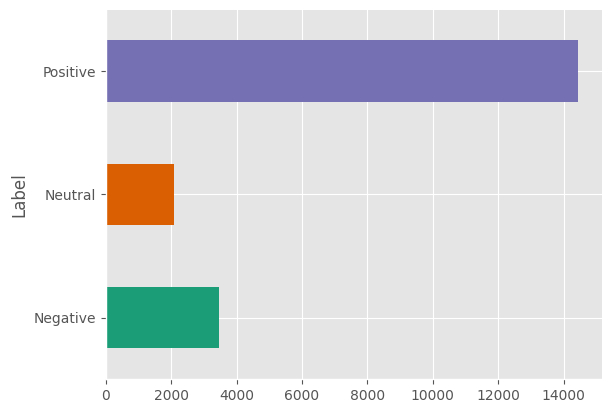

In [ ]:
# Visualisatiobn of label distribution in Test Data

from matplotlib import pyplot as plt
import seaborn as sns
testing_df_copy.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Define the company names and their associated application codes
companies = {
    'AAD_1': ['B004NWLM8K', 'B004Q1NH4U', 'B004LPBTAA'],
    'AAD_2': ['B004S6NAOU', 'B004R6HTWU', 'B004N8KDNY'],
    'AAD_3': ['B004KA0RBS', 'B004NPELDA', 'B004L26XXQ']
}

In [ ]:
# Function to assign company names based on AppId
def assign_company(app_id, companies):
    for company, app_ids in companies.items():
        if app_id in app_ids:
            return company
    return None

# Add a new column 'Company' to the DataFrame
testing_df_copy['Company'] = testing_df_copy['AppId'].apply(lambda x: assign_company(x, companies))

testing_df_copy.head()

,Label,AppId,Review,Company
0,Positive,B004K4RY9M,I am a person who has always enjoyed word game...,None
1,Positive,B004K4RY9M,Love this. I try to beat my own time to see h...,None
2,Positive,B004K4RY9M,This game is fun and it can also be alearning ...,None
3,Positive,B004K4RY9M,I enjoy these puzzles have books of them keep ...,None
4,Positive,B004K4RY9M,Have spent many enjoyable hours playing this g...,None


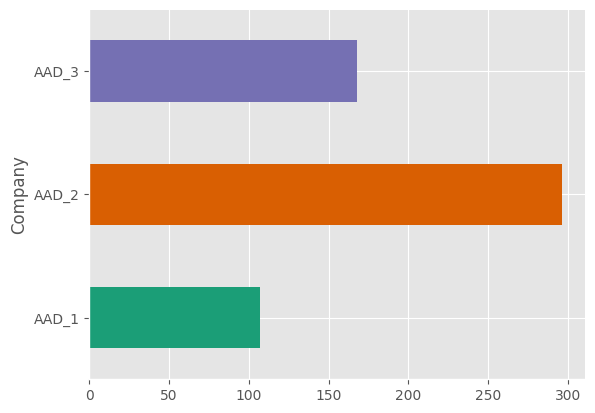

In [ ]:
# Visualisation of Review  distribution According to the company

from matplotlib import pyplot as plt
import seaborn as sns
testing_df_copy.groupby('Company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

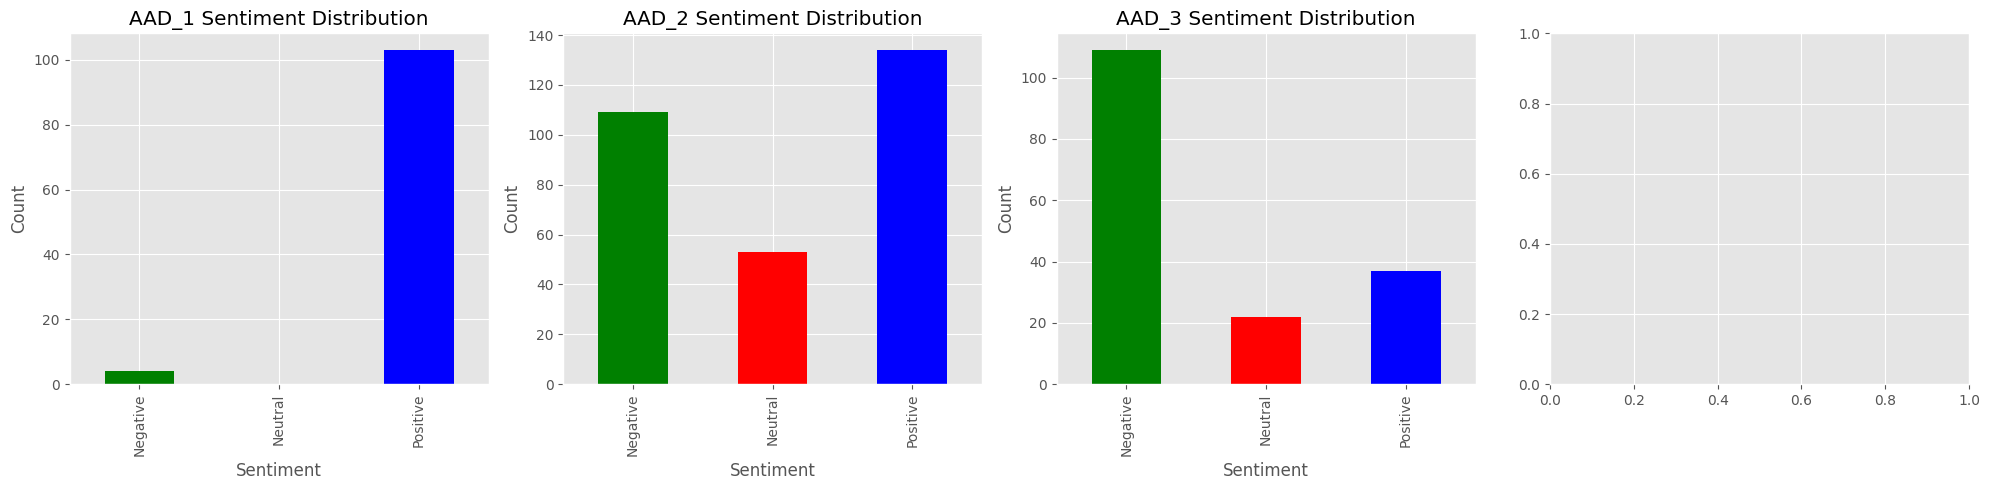

In [ ]:
# Filter out rows with None in 'Company' column
df_filtered = testing_df_copy.dropna(subset=['Company'])

# Group by company and label, and count the occurrences
grouped = df_filtered.groupby(['Company', 'Label']).size().unstack(fill_value=0)



# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i, company in enumerate(companies.keys()):
    ax = axes[i]
    grouped.loc[company].plot(kind='bar', ax=ax, color=['green', 'red', 'blue'])
    ax.set_title(f'{company} Sentiment Distribution')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Display the counts
print("Review Counts by Company:")
print(grouped)



Review Counts by Company:
Label    Negative  Neutral  Positive
Company                             
AAD_1           4        0       103
AAD_2         109       53       134
AAD_3         109       22        37


In [ ]:
training_df.head()


,Label,AppId,Review
0,3,B004K4RY9M,I am a person who has always enjoyed word game...
1,3,B004K4RY9M,Love this. I try to beat my own time to see h...
2,3,B004K4RY9M,This game is fun and it can also be alearning ...
3,3,B004K4RY9M,I enjoy these puzzles have books of them keep ...
4,3,B004K4RY9M,Have spent many enjoyable hours playing this g...


# Data Pre-processing/cleaning

In [ ]:
print(training_df.isnull().sum())

Label     0
AppId     0
Review    0
dtype: int64


remove all special characters and puntuation from text data

In [ ]:
training_df['Review' ] = training_df['Review'].str.replace("[^a-zA-Z0-9]", " ")

**covert all text data into lower case**

In [ ]:
#lower case
training_df['Review'] = [row.lower() for row in training_df['Review']]


**remove stop words**

In [ ]:
#remove stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')

In [ ]:

def remove_stopwords(text):
  tokenized= word_tokenize(text )
  text_new = " ".join([i for i in tokenized if i  not in stop_words])
  return text_new

In [ ]:
training_df['Review'] = [remove_stopwords(r) for r in training_df['Review']]

**Remove all non - english languages**

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=7198ccdbf98e890956fe8bfc8a8a86ed6554471a62ec1d682dc30ed117f053c7
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect

# Function to detect the language of a text snippet
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"  # Handle cases where language detection fails

# Detect the language for each row in the DataFrame
training_df['Detected Language'] = training_df.apply(lambda row: detect_language(row['Review']), axis=1)

# Drop rows where the detected language is not English ('en')
training_df = training_df[training_df['Detected Language'] == 'en']

# Reset the index after dropping rows
training_df = training_df.reset_index(drop=True)

**Lemmatization**

In [ ]:


# Begin Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


training_df['Review'] = training_df['Review'].apply(lambda x: lemmatize_sentence(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**dataset after all preprocessing is done**

In [ ]:
training_df.head()

,Label,AppId,Review
0,2,B004A9SDD8,"love song , really could n't wait play . littl..."
1,3,B004A9SDD8,"oh , little grandson love app . 's always ask ..."
2,3,B004A9SDD8,find perfect time since daughter 's favorite s...
3,3,B004A9SDD8,1 year old go back game . simple easy toddler ...
4,3,B004A9SDD8,three different version song . game keep occup...


 # **Feature Extraction**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Download NLTK resources if not already present
nltk.download('punkt')
nltk.download('opinion_lexicon')
nltk.download('averaged_perceptron_tagger')

# Load opinion lexicon (sentiment lexicon)
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:

# Function to extract sentiment using sentiment lexicon
def extract_sentiment(text):
    tokens = word_tokenize(text)
    num_positive = sum(1 for word in tokens if word in positive_words)
    num_negative = sum(1 for word in tokens if word in negative_words)
     # Check for highest count and return sentiment
    if num_positive > num_negative:
        return 'positive'
    elif num_negative > num_positive:
        return 'negative'
    else:
        # Handle no neutral list by returning 'neutral' if both positive and negative are zero
        if num_positive == 0 and num_negative == 0:
            return 'neutral'
        # Otherwise, consider it neutral if positive and negative counts are equal
        else:
            return 'neutral'

# Example usage
training_df['LexiconSentiment'] = training_df['Review'].apply(extract_sentiment)


def transform_sentiment(lexicon_sentiment):
    if lexicon_sentiment == 'negative':
        return 1  # Negative
    elif lexicon_sentiment == 'neutral':
        return 2  # Neutral
    else:  # lexicon_sentiment > 0
        return 3  # Positive

# Apply the transformation to your DataFrame
training_df['Sentiment'] = training_df['LexiconSentiment'].apply(transform_sentiment)


In [ ]:
training_df

,Label,AppId,Review,LexiconSentiment,Sentiment
0,2,B004A9SDD8,"love song , really could n't wait play . littl...",positive,3
1,3,B004A9SDD8,"oh , little grandson love app . 's always ask ...",positive,3
2,3,B004A9SDD8,find perfect time since daughter 's favorite s...,positive,3
3,3,B004A9SDD8,1 year old go back game . simple easy toddler ...,positive,3
4,3,B004A9SDD8,three different version song . game keep occup...,negative,1
...,...,...,...,...,...
19996,3,B004K4RY9M,particular word search challenge one timed fin...,positive,3
19997,1,B004K4RY9M,hard use . finger would n't pick word right fr...,negative,1
19998,3,B004K4RY9M,"keep mind sharp , good eye hand coordination ,...",positive,3
19999,3,B004K4RY9M,really fun one - great kindle fire airplane wo...,positive,3


In [ ]:
# Part-of-Speech Tagging using NLTK
def pos_tagging(text):
    tokens = word_tokenize(text)
    return nltk.pos_tag(tokens)

# Example usage
training_df['POS_Tagged'] = training_df['Review'].apply(pos_tagging)

# For Word Embeddings (using Word2Vec as an example)
from gensim.models import Word2Vec

# Tokenize sentences
sentences = [word_tokenize(review) for review in training_df['Review']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, min_count=1)



In [ ]:
def average_word2vec(review, model, num_features):
    words = word_tokenize(review)
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv.index_to_key:
            if n_words == 0:
                 feature_vector = np.zeros((num_features,), dtype="float32")  # Initialization
            else:
                 feature_vector += model.wv[word]  # In-place addition
            n_words += 1

    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

word2vec_dim = 100  # Assuming Word2Vec vectors are of dimension 100
training_df['Word2Vec'] = training_df['Review'].apply(lambda x: average_word2vec(x, word2vec_model, word2vec_dim))

In [ ]:
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict

In [ ]:

!pip install vaderSentiment



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [ ]:

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def calculate_vader_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

training_df['VaderScores'] = training_df['Review'].apply(calculate_vader_scores)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import numpy as np

def flatten_word2vec(word2vec_vector):
    return word2vec_vector.flatten()

# Assuming your Word2Vec vectors have 100 dimensions:
word2vec_dim = 100
for i in range(word2vec_dim):
    column_name = f'Word2Vec_Dim{i+1}'
    training_df[column_name] = training_df['Word2Vec'].apply(lambda x: flatten_word2vec(x)[i])


<ipython-input-34-41f1a66ee84e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  training_df[column_name] = training_df['Word2Vec'].apply(lambda x: flatten_word2vec(x)[i])
<ipython-input-34-41f1a66ee84e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  training_df[column_name] = training_df['Word2Vec'].apply(lambda x: flatten_word2vec(x)[i])
<ipython-input-34-41f1a66ee84e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [ ]:
from sklearn.decomposition import PCA

# 1. Gather Flattened Word2Vec Columns
word2vec_cols = [col  for col in training_df.columns if col.startswith('Word2Vec_Dim')]

# 2. Extract Data as a NumPy Array
word2vec_features = training_df[word2vec_cols].to_numpy()

# 3. Perform PCA
pca = PCA(n_components=5)  # Reduce to 20 dimensions
reduced_word2vec_features = pca.fit_transform(word2vec_features)

# 4. (Optional) Create New Columns in DataFrame
for i in range(5):
    column_name = f'Reduced_Word2Vec_Dim{i+1}'
    training_df[column_name] = reduced_word2vec_features[:, i]

<ipython-input-35-5fe6a3694b2f>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  training_df[column_name] = reduced_word2vec_features[:, i]
<ipython-input-35-5fe6a3694b2f>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  training_df[column_name] = reduced_word2vec_features[:, i]
<ipython-input-35-5fe6a3694b2f>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

In [ ]:
X = training_df[['Sentiment','Reduced_Word2Vec_Dim1', 'Reduced_Word2Vec_Dim2','Reduced_Word2Vec_Dim3', 'Reduced_Word2Vec_Dim4','Reduced_Word2Vec_Dim5', 'VaderScores']]
y = training_df['Label']

In [ ]:
X

,Sentiment,Reduced_Word2Vec_Dim1,Reduced_Word2Vec_Dim2,Reduced_Word2Vec_Dim3,Reduced_Word2Vec_Dim4,Reduced_Word2Vec_Dim5,VaderScores
0,3,1.222769,-0.360101,-0.032979,0.073321,0.518110,0.7731
1,3,-0.048342,-0.180557,0.123701,-0.411349,0.105269,0.7850
2,3,0.802786,-0.034646,-0.296365,0.043589,-0.166092,0.9617
3,3,0.843975,-0.083079,-0.546301,0.241889,-0.112526,0.8398
4,1,-0.308698,0.358288,0.732881,-0.671407,-0.455694,0.7405
...,...,...,...,...,...,...,...
19996,3,0.750489,-0.415249,1.130310,1.145006,-0.579775,0.4939
19997,1,0.243716,-0.600848,0.223697,0.362303,0.354938,-0.5267
19998,3,0.803372,-0.343925,0.355908,0.050129,-0.204932,0.9648
19999,3,0.341384,0.027531,-1.270952,0.105765,0.011091,0.8425


In [ ]:
training_df

,Label,AppId,Review,Detected Language,LexiconSentiment,Sentiment,POS_Tagged,Word2Vec,VaderScores
0,2,B004A9SDD8,"love song , really could n't wait play . littl...",en,positive,2,"[(love, NN), (song, NN), (,, ,), (really, RB),...","[-0.49711195, 0.3338278, 0.31026536, -0.214401...",0.7731
1,3,B004A9SDD8,"oh , little grandson love app . 's always ask ...",en,positive,2,"[(oh, UH), (,, ,), (little, JJ), (grandson, NN...","[-0.22998703, 0.47660643, 0.0361956, 0.1589864...",0.7850
2,3,B004A9SDD8,find perfect time since daughter 's favorite s...,en,positive,2,"[(find, VB), (perfect, JJ), (time, NN), (since...","[-0.35331827, 0.5705921, 0.2121245, -0.1100738...",0.9617
3,3,B004A9SDD8,1 year old go back game . simple easy toddler ...,en,positive,2,"[(1, CD), (year, NN), (old, JJ), (go, VBP), (b...","[-0.41506386, 0.49914747, 0.18993078, -0.01584...",0.8398
4,3,B004A9SDD8,three different version song . game keep occup...,en,negative,0,"[(three, CD), (different, JJ), (version, NN), ...","[-0.24847163, 0.42475992, 0.20751777, 0.099974...",0.7405
...,...,...,...,...,...,...,...,...,...
19340,3,B004K4RY9M,particular word search challenge one timed fin...,en,positive,2,"[(particular, JJ), (word, NN), (search, NN), (...","[0.07083305, 0.48365563, 0.12757692, -0.382775...",0.4939
19341,1,B004K4RY9M,hard use . finger would n't pick word right fr...,en,negative,0,"[(hard, JJ), (use, NN), (., .), (finger, NN), ...","[-0.24507655, 0.22233842, 0.151159, -0.0948163...",-0.5267
19342,3,B004K4RY9M,"keep mind sharp , good eye hand coordination ,...",en,positive,2,"[(keep, VB), (mind, NN), (sharp, JJ), (,, ,), ...","[-0.35283643, 0.50441366, 0.25951457, 0.031249...",0.9648
19343,3,B004K4RY9M,really fun one - great kindle fire airplane wo...,en,positive,2,"[(really, RB), (fun, VB), (one, CD), (-, :), (...","[-0.4029148, 0.34237483, 0.3424479, 0.04442491...",0.8425


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict

# **Esemble Method VotingClassifier Using Random Forest and SVM**

In [ ]:

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True)

In [ ]:

# Create the ensemble using majority voting
ensemble = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model)], voting='hard')

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predictions
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble
accuracy = ensemble.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Log the metrics
print("Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Metrics:
Accuracy: 0.7720569857535616
Precision: 0.719494120044772
Recall: 0.7720569857535616
F1-Score: 0.730859545629046


Text(50.722222222222214, 0.5, 'y_pred')

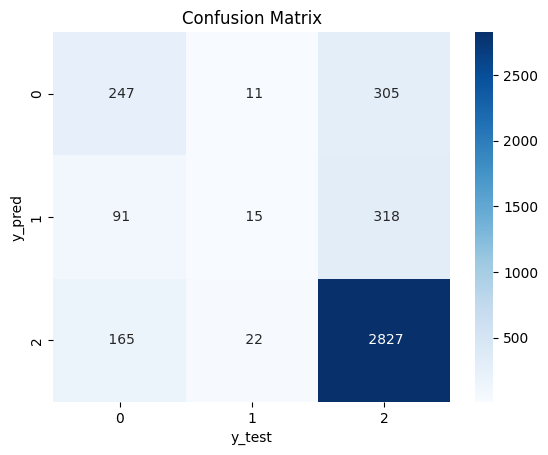

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

# **Amazon Review Sentiment Analysis using CNN DeepLearning**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Splitting the dataset in train and test split

In [ ]:

X=training_df['Review']
y=training_df['Label']
df_train,df_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (13400,)
DF Test Shape:  (6601,)
Y Train Shape:  (13400,)
Y Test Shape:  (6601,)


# Building deep learn model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)


In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 17521 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(13400, 1520)

In [ ]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(6601, 1520)

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1520)]            0         
                                                                 
 embedding (Embedding)       (None, 1520, 20)          350440    
                                                                 
 conv1d (Conv1D)             (None, 1518, 32)          1952      
                                                                 
 max_pooling1d (MaxPooling1  (None, 506, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 504, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 168, 64)           0         
 g1D)                                                        

# Training the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
134/134 [==============================] - 51s 368ms/step - loss: 0.8171 - accuracy: 0.7275 - val_loss: 0.6385 - val_accuracy: 0.7519
Epoch 2/5
134/134 [==============================] - 46s 347ms/step - loss: 0.5840 - accuracy: 0.7646 - val_loss: 0.5196 - val_accuracy: 0.8034
Epoch 3/5
134/134 [==============================] - 46s 345ms/step - loss: 0.4503 - accuracy: 0.8222 - val_loss: 0.4967 - val_accuracy: 0.8125
Epoch 4/5
134/134 [==============================] - 45s 337ms/step - loss: 0.3670 - accuracy: 0.8531 - val_loss: 0.5368 - val_accuracy: 0.8064
Epoch 5/5
134/134 [==============================] - 47s 347ms/step - loss: 0.3009 - accuracy: 0.8822 - val_loss: 0.6035 - val_accuracy: 0.7985


In [ ]:
y_pred=model.predict(data_test)
y_pred

207/207 [==============================] - 3s 12ms/step


array([[3.6524412e-11, 4.0386920e-05, 8.3011470e-04, 9.9912941e-01,
        4.7060666e-10],
       [5.0956351e-06, 2.2579440e-01, 2.5168052e-01, 5.2250564e-01,
        1.4304015e-05],
       [1.7937641e-06, 5.0372530e-02, 8.5379653e-02, 8.6423945e-01,
        6.6307116e-06],
       ...,
       [1.7826447e-07, 7.4143219e-04, 1.0244696e-02, 9.8901290e-01,
        7.6418638e-07],
       [4.0457799e-05, 6.7298584e-02, 1.2296246e-01, 8.0960029e-01,
        9.8200624e-05],
       [4.8028648e-10, 5.0419472e-05, 1.4897076e-03, 9.9845994e-01,
        4.1765533e-09]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

# Scoring

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(50.722222222222214, 0.5, 'y_pred')

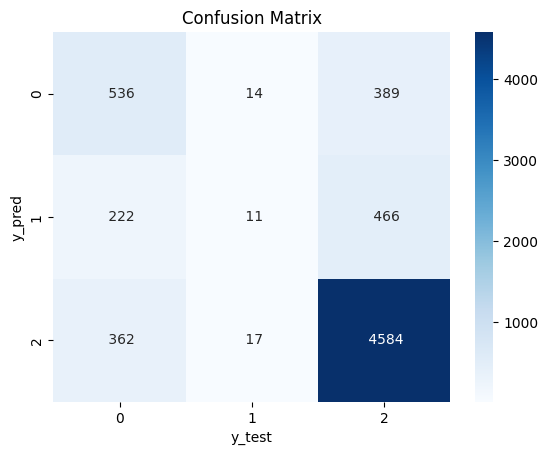

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.48      0.57      0.52       939
           2       0.26      0.02      0.03       699
           3       0.84      0.92      0.88      4963

    accuracy                           0.78      6601
   macro avg       0.53      0.50      0.48      6601
weighted avg       0.73      0.78      0.74      6601

